**Importing modules,Mounting to drive,Changing directory to project folder**

In [ ]:
#Importing modules
import pandas as pd
import os

#Mounting to drive
from google.colab import drive
drive.mount('/content/drive')

#Changing directory to project folder
os.chdir('/content/drive/MyDrive/project')

Mounted at /content/drive


**Creating dataframe by reading excel file**

In [ ]:
rain_df = pd.read_excel('sydney_rainprediction.xlsx')

**Exploratory Data Analysis**

In [ ]:
#get the shape of data frame
rain_df.shape

(3337, 17)

**Check if there any missing values**

In [ ]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

We can see that there are some missing values in
MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm.So I am filling the missing values with mean.

**Filling missing values with mean values to make the data consistent**

In [ ]:
rain_df['Temp3pm'] = rain_df['Temp3pm'].fillna(value=rain_df['Temp3pm'].mean())
rain_df['Sunshine'] = rain_df['Sunshine'].fillna(value=rain_df['Sunshine'].mean())
rain_df['Cloud3pm'] = rain_df['Cloud3pm'].fillna(value=rain_df['Cloud3pm'].mean())
rain_df['Rainfall'] = rain_df['Rainfall'].fillna(value=rain_df['Rainfall'].mean())
rain_df['Humidity3pm'] = rain_df['Humidity3pm'].fillna(value=rain_df['Humidity3pm'].mean())
rain_df['Humidity9am'] = rain_df['Humidity9am'].fillna(value=rain_df['Humidity9am'].mean())
rain_df['Evaporation'] = rain_df['Evaporation'].fillna(value=rain_df['Evaporation'].mean())
rain_df['Cloud9am'] = rain_df['Cloud9am'].fillna(value=rain_df['Cloud9am'].mean())
rain_df['MinTemp'] = rain_df['MinTemp'].fillna(value=rain_df['MinTemp'].mean())
rain_df['MaxTemp'] = rain_df['MaxTemp'].fillna(value=rain_df['MaxTemp'].mean())
rain_df['Pressure9am'] = rain_df['Pressure9am'].fillna(value=rain_df['Pressure9am'].mean())
rain_df['Pressure3pm'] = rain_df['Pressure3pm'].fillna(value=rain_df['Pressure3pm'].mean())
rain_df['Temp9am'] = rain_df['Temp9am'].fillna(value=rain_df['Temp9am'].mean())
rain_df['RainToday'] = rain_df['RainToday'].fillna(value=rain_df['RainToday'].mean())


In [ ]:
#check if all the missing values are filled
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   MinTemp           3337 non-null   float64       
 2   Rainfall          3337 non-null   float64       
 3   Evaporation       3337 non-null   float64       
 4   Sunshine          3337 non-null   float64       
 5   Humidity9am       3337 non-null   float64       
 6   Humidity3pm       3337 non-null   float64       
 7   Cloud9am          3337 non-null   float64       
 8   Cloud3pm          3337 non-null   float64       
 9   Temp3pm           3337 non-null   float64       
 10  RainToday_Yes     3337 non-null   uint8         
 11  RainTomorrow_Yes  3337 non-null   uint8         
dtypes: datetime64[ns](1), float64(9), uint8(2)
memory usage: 267.3 KB


Now that the missing values are filled , next step is to find the co.relation between variables.

<ipython-input-7-10d44d4cffef>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rain_df.corr(), annot=True, cmap="coolwarm")


Text(0.5, 1.0, 'Correlation Heatmap')

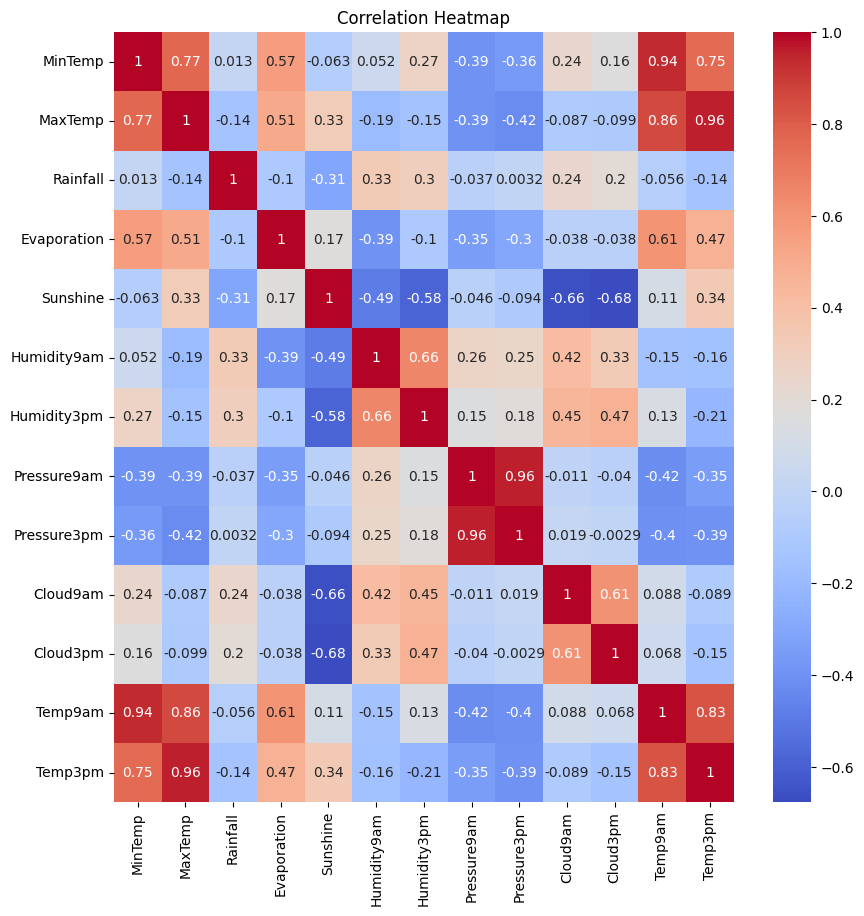

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(rain_df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')

From the heatmap, we can see higher corelation in Pressure3pm,Temp9am,Pressure9am,MaxTemp and location is not significant. So I am deleting all these variables.


**Deleting unnecessary variables and variables with higher co relation**

In [ ]:
del rain_df['Pressure3pm']
del rain_df['Location']
del rain_df['Temp9am']
del rain_df['Pressure9am']
del rain_df['MaxTemp']


In [ ]:
rain_df = pd.get_dummies(rain_df, columns = ["RainToday", "RainTomorrow"], drop_first = True)

I am creating dummy variables for "RainToday", "RainTomorrow" so that the models can access categorical data easily as they require numerical input.

In [ ]:
#check if dummy variables are created and columns are deleted
rain_df.head()

,Date,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,19.5,15.6000,6.200000,0.0,92.0,84.0,8.0,8.0,20.9,1,1
1,2008-02-02,19.5,6.0000,3.400000,2.7,83.0,73.0,7.0,7.0,24.8,1,1
2,2008-02-03,21.6,6.6000,2.400000,0.1,88.0,86.0,7.0,8.0,23.0,1,1
3,2008-02-04,20.2,18.8000,2.200000,0.0,83.0,90.0,8.0,8.0,20.9,1,1
4,2008-02-05,19.7,67.9848,5.187432,0.0,88.0,74.0,8.0,8.0,25.5,1,1


In [ ]:
#check the corelation after deleting the variables
rain_df.corr()

<ipython-input-10-1f937f762c93>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rain_df.corr()


,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.012866,0.567623,-0.062959,0.052362,0.270944,0.236288,0.163519,0.752410,0.018690,0.079962
Rainfall,0.012866,1.000000,-0.100468,-0.306119,0.330469,0.301337,0.242049,0.200732,-0.143491,0.555015,0.293808
Evaporation,0.567623,-0.100468,1.000000,0.174467,-0.394166,-0.101849,-0.037598,-0.037739,0.473879,-0.228791,-0.064301
Sunshine,-0.062959,-0.306119,0.174467,1.000000,-0.489019,-0.582792,-0.660555,-0.676397,0.343563,-0.367080,-0.521637
Humidity9am,0.052362,0.330469,-0.394166,-0.489019,1.000000,0.658120,0.423560,0.331734,-0.157149,0.400603,0.329011
Humidity3pm,0.270944,0.301337,-0.101849,-0.582792,0.658120,1.000000,0.453697,0.471684,-0.213727,0.342936,0.471250
Cloud9am,0.236288,0.242049,-0.037598,-0.660555,0.423560,0.453697,1.000000,0.608995,-0.089334,0.316502,0.329525
Cloud3pm,0.163519,0.200732,-0.037739,-0.676397,0.331734,0.471684,0.608995,1.000000,-0.145863,0.260599,0.413217
Temp3pm,0.752410,-0.143491,0.473879,0.343563,-0.157149,-0.213727,-0.089334,-0.145863,1.000000,-0.189134,-0.188951
RainToday_Yes,0.018690,0.555015,-0.228791,-0.367080,0.400603,0.342936,0.316502,0.260599,-0.189134,1.000000,0.340894


<ipython-input-148-8db494be519c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rain_df.corr(), annot=True, cmap="coolwarm")


Text(0.5, 1.0, 'Correlation Heatmap')

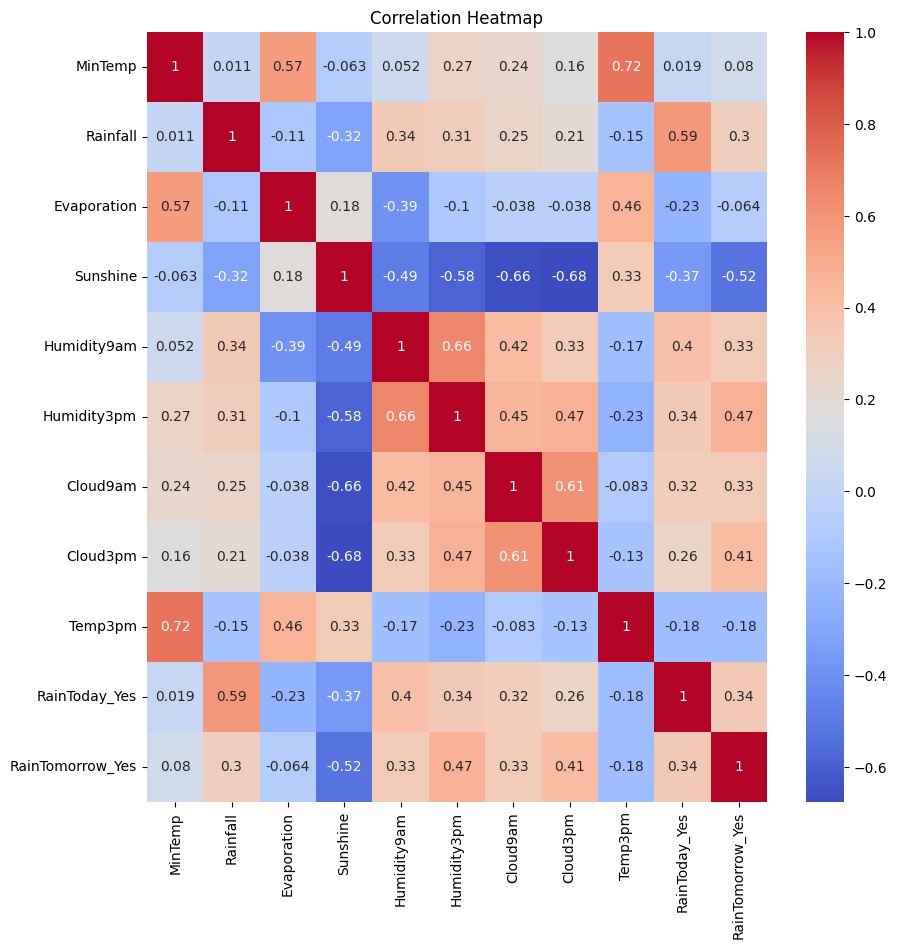

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(rain_df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')

After  deleting the variables with higher corelation , now we can see all the data is consistent and there is no higher corelation among variables which can lead to multi collinearity and machine learning models has quality input now.

In [ ]:
#Analyse potential outliers and skewness
rain_df.describe()

,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,3.330231,5.187432,7.179374,68.229010,54.699158,4.181523,4.218660,21.533333,0.259515,0.259215
std,4.551593,9.886270,2.756095,3.801737,15.053668,16.261752,2.505491,2.409531,4.301156,0.438434,0.438269
min,4.300000,0.000000,0.000000,0.000000,19.000000,10.000000,0.000000,0.000000,10.200000,0.000000,0.000000
25%,11.000000,0.000000,3.200000,4.300000,58.000000,44.000000,2.000000,2.000000,18.400000,0.000000,0.000000
50%,14.900000,0.000000,4.800000,8.200000,69.000000,56.000000,4.181523,4.218660,21.300000,0.000000,0.000000
75%,18.700000,1.400000,7.000000,10.200000,80.000000,64.000000,7.000000,7.000000,24.500000,1.000000,1.000000
max,27.600000,119.400000,18.400000,13.600000,100.000000,99.000000,9.000000,8.000000,44.700000,1.000000,1.000000



Observations
- We can see the count of all variables is same 3337 after filling the missing values with mean values,now there are no missing values.

1. **MinTemp:** Potential outliers as maximum value 27 is higher than the 75% value 18 and mean is slightly less than median with negative skewness.

2. **Rainfall:** Potential outliers as maximum value 119 is higher than the 75% value 1.4 and positively skewed as mean 3.3 is greater than median 0.

3. **Evaporation:** Potential outliers as maximum value 18 is higher than the 75% value 7 and positively skewed as mean is greater than median.

4. **Sunshine:** mean is less than median so negatively skewed  and max value is closer to 75 % so no outliers.

5. **Temp3pm:** Potential outliers as maximum value is higher than the 75% value and mean is higher than median so slightly positive skewness.

6. **Humidity9am and Humidity3pm:**  Potential outliers as maximum value is higher than the 75% value ,as mean is less than median negatively skewed.

7. **Cloud9am and Cloud3pm:** mean is same as median and maximum value is closer to 75 % value so no outliers and no skewness.

**Pre processing visualisations along with outlier detection and treatment**

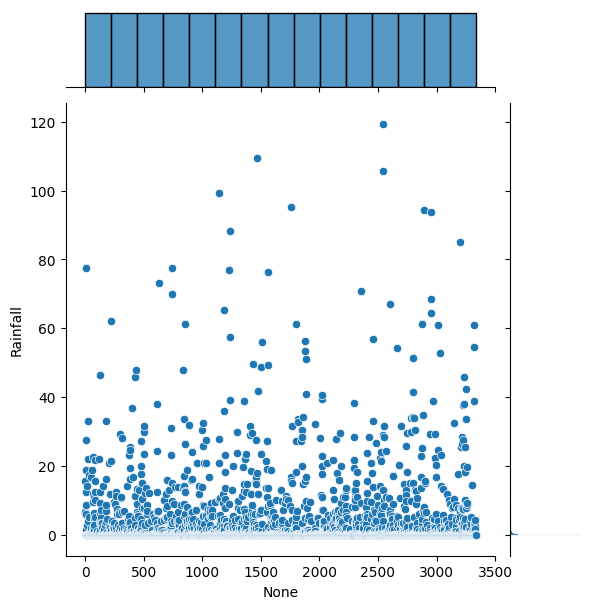

In [ ]:
sns.jointplot(rain_df['Rainfall'])

<Axes: xlabel='Rainfall'>

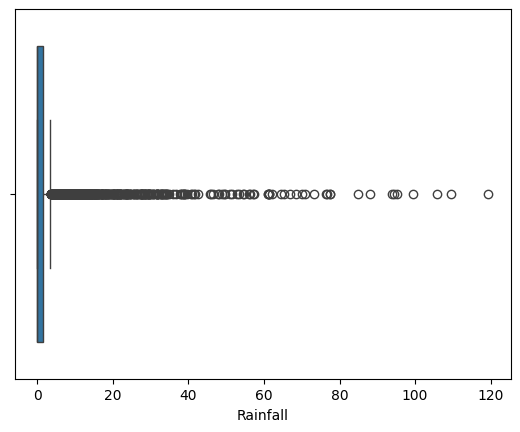

In [ ]:
sns.boxplot(x=rain_df['Rainfall'])

<ipython-input-14-48de0ad888a4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=rain_df['Rainfall'])


<Axes: ylabel='Density'>

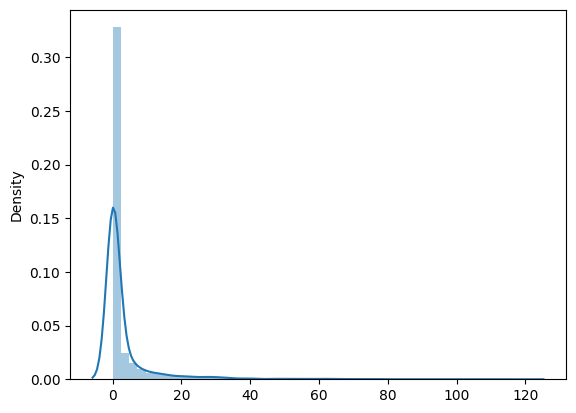

In [ ]:
sns.distplot(x=rain_df['Rainfall'])

From above visualisations ,we can see that ,there are extreme outliers in the upper end of Rainfal.So I am capping the values with 1.3 times the upper limit value.

In [ ]:
import numpy as np
# Calculate the 99th percentile of the Rainfall column
ul = np.percentile(rain_df['Rainfall'], 99)

# Set values exceeding 1.3 times the upper limit to 1.3 times the upper limit
rain_df.loc[rain_df['Rainfall'] > 1.3 * ul, 'Rainfall'] = 1.3 * ul
print("Upper limit:", ul)

Upper limit: 52.29599999999982


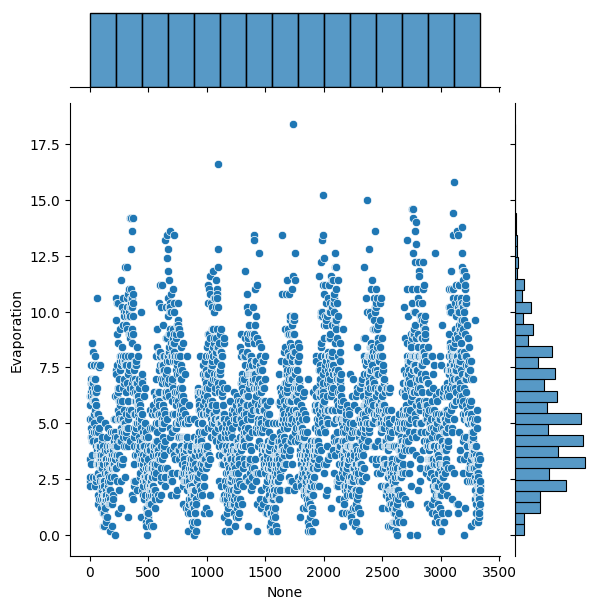

In [ ]:
sns.jointplot(rain_df['Evaporation'])

<Axes: xlabel='Evaporation'>

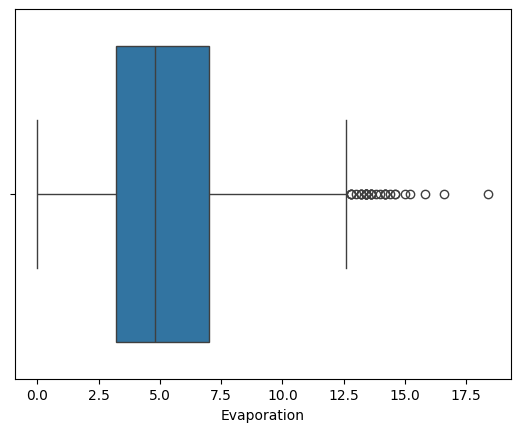

In [ ]:
sns.boxplot(x=rain_df['Evaporation'])

<Axes: xlabel='Evaporation', ylabel='Count'>

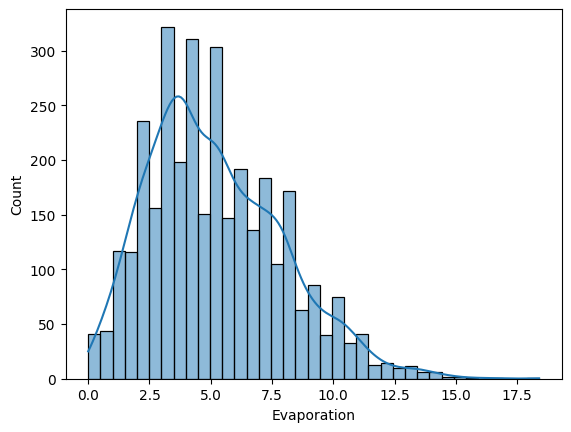

In [ ]:
sns.histplot(rain_df['Evaporation'], kde=True)



From above visualisations ,we can see that ,there are outliers in the upper end of Evaporation.So I am capping the values with 1.2 * upper limit value.

In [ ]:
# Calculate the 99th percentile of the Evaporation column
ul = np.percentile(rain_df['Evaporation'], 99)

# Set values exceeding 1.2 times the upper limit to 1.2 times the upper limit
rain_df.loc[rain_df['Evaporation'] > 1.2 * ul, 'Evaporation'] = 1.2 * ul
print("Upper limit:", ul)

Upper limit: 12.8


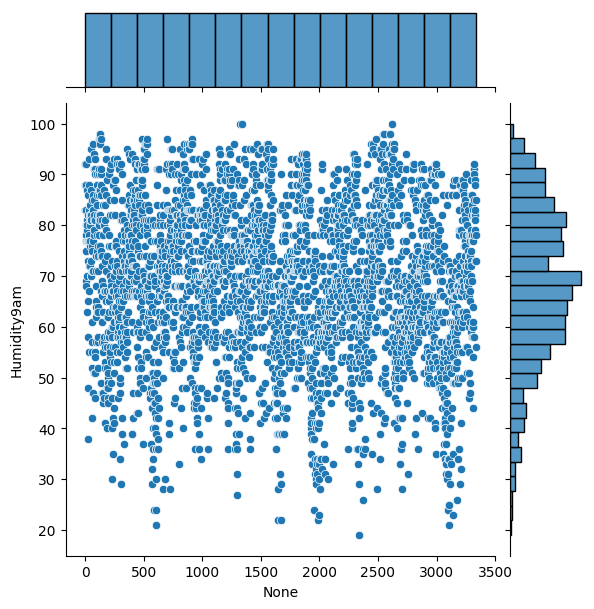

In [ ]:
sns.jointplot(rain_df['Humidity9am'])

<Axes: xlabel='Humidity9am'>

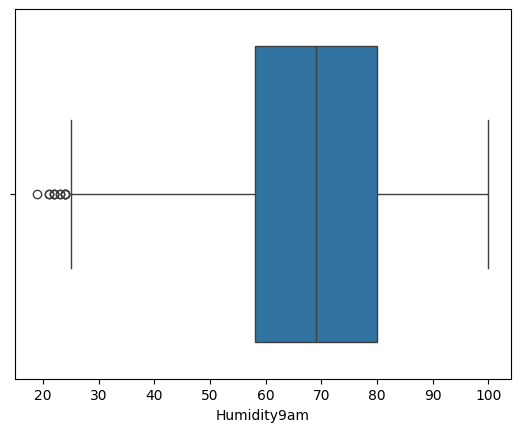

In [ ]:
sns.boxplot(x=rain_df['Humidity9am'])

<Axes: xlabel='Humidity9am', ylabel='Count'>

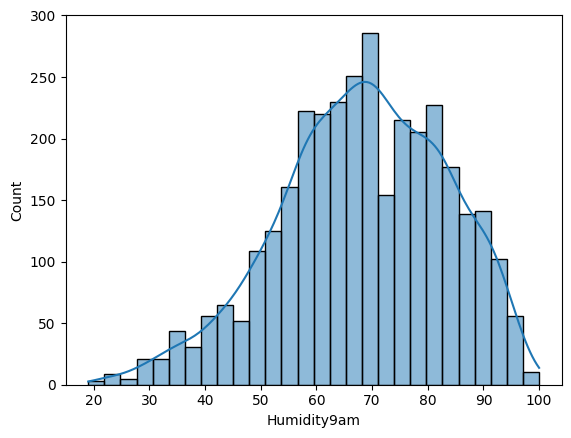

In [ ]:
sns.histplot(rain_df['Humidity9am'], kde=True)



From above visualisations ,we can see that ,there are outliers in the lower end of Humidity9am.So I am capping the values with 0.8 * lower limit value.

In [ ]:
# Calculate the 1st percentile of the Humidity9am column
lv = np.percentile(rain_df['Humidity9am'], 1)

# Set values below the lower limit to 0.8 * lv
rain_df.loc[rain_df['Humidity9am'] < lv, 'Humidity9am'] = 0.8 * lv
print("Lower limit:", lv)

Lower limit: 30.0


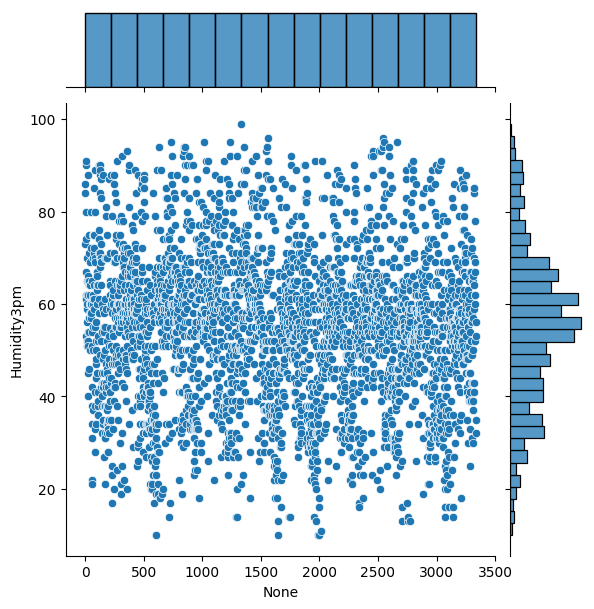

In [ ]:
sns.jointplot(rain_df['Humidity3pm'])

<Axes: xlabel='Humidity3pm'>

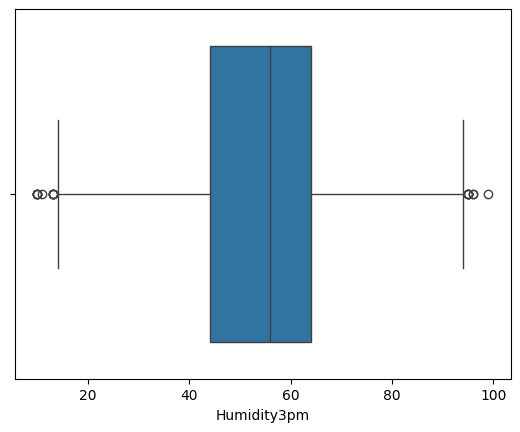

In [ ]:
sns.boxplot(x=rain_df['Humidity3pm'])

<Axes: xlabel='Humidity3pm', ylabel='Count'>

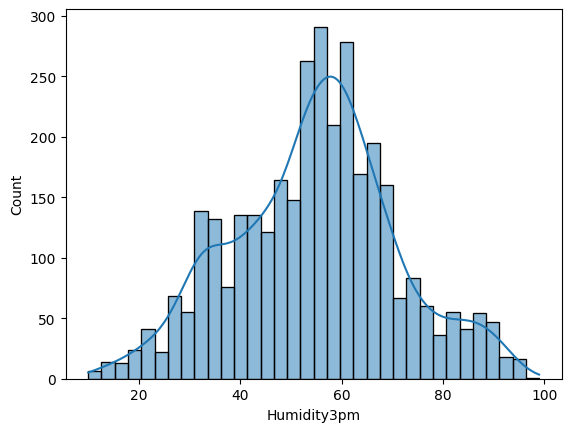

In [ ]:
sns.histplot(rain_df['Humidity3pm'], kde=True)



From above visualisations ,we can see that ,there are outliers in the upper,lower end of Humidity3pm..So I am capping the lower outliers values with 0.8 * lower limit value, upper outliers values with upper limit value

In [ ]:
# Calculate the 99th percentile of the Humidity3pm column
ul = np.percentile(rain_df['Humidity3pm'], 99)

# Set values exceeding the upper limit to ul
rain_df.loc[rain_df['Humidity3pm'] > ul, 'Humidity3pm'] = ul

# Calculate the 1st percentile of the Humidity3pm column
lv = np.percentile(rain_df['Humidity3pm'], 1)

# Set values below the lower limit to 0.8 * lv
rain_df.loc[rain_df['Humidity3pm'] < lv, 'Humidity3pm'] = 0.8 * lv

# Print the upper and lower limits
print("Upper limit:", ul)
print("Lower limit:", lv)



Upper limit: 92.0
Lower limit: 18.0


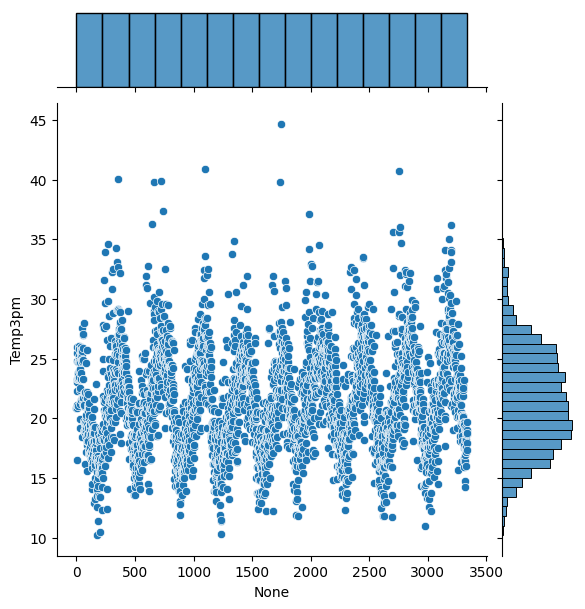

In [ ]:
sns.jointplot(rain_df['Temp3pm'])

<Axes: xlabel='Temp3pm'>

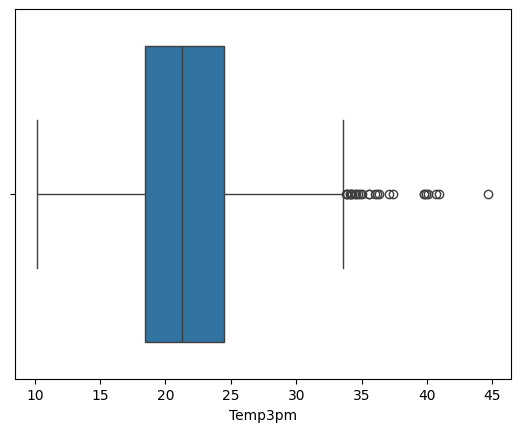

In [ ]:
sns.boxplot(x=rain_df['Temp3pm'])

<Axes: xlabel='Temp3pm', ylabel='Count'>

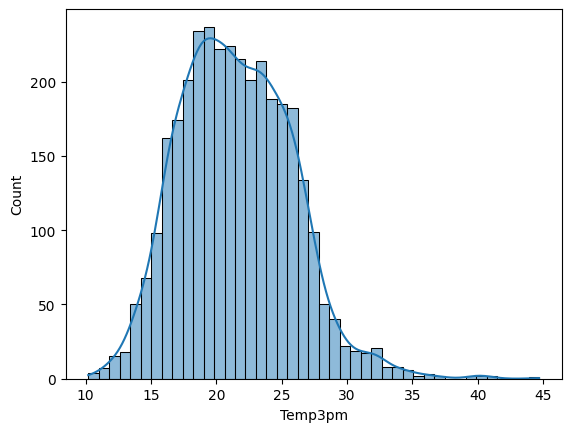

In [ ]:
sns.histplot(rain_df['Temp3pm'], kde=True)

From above visualisations ,we can see that ,there are outliers in the upper end of Humidity9am.So I am capping the values with 1.2 * upper limit value.

In [ ]:
# Calculate the 99th percentile of the Temp3pm column
ul = np.percentile(rain_df.Temp3pm, [99])[0]
rain_df.iloc[rain_df.Temp3pm > ul, rain_df.columns.get_loc('Temp3pm')] = 1.2 * ul
# Print the upper limit
print("Upper limit:", ul)

Upper limit: 36.93475199999915


**Test Train Split**

In [ ]:
# Selecting features (all columns except "RainTomorrow_Yes")
x = rain_df.loc[:, rain_df.columns != "RainTomorrow_Yes"]

# Dropping the "Date" column as it's not considered a feature
x = x.loc[:, x.columns != "Date"]

# Selecting the target variable "RainTomorrow_Yes"
y = rain_df["RainTomorrow_Yes"]


As our aim is to predict RainTomorrow , i am assigning RainTomorrow as target variable y. the variable x contains all features except RainTomorrow.

In [ ]:
# Import necessary libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Fit StandardScaler to the features (x) and transform them
scaler = preprocessing.StandardScaler().fit(x)
x_scaled = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2669, 10) (2669,)
(668, 10) (668,)


I am sliptting the dataset into train and test data sets 80% for training and 20% for testing

The reason for this is , where there is more data available for training ,model gives more accurate results .so 80 % of data helps the model to understand the data clearly and the remaining 20 % is used for test predictions.

**Building Machine learning models**

**DecisionTreeClassifier**

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier as d
from sklearn.metrics import accuracy_score as a

# Initialize a Decision Tree Classifier
dt = d(max_depth=3, random_state=42)

# Fit the Decision Tree model on the training data
dt.fit(x_train, y_train)

# Use the model to make predictions
d_train = dt.predict(x_train)
d_test = dt.predict(x_test)

# Calculate accuracy scores
as_dt_train = a(y_train, d_train)
as_dt_test = a(y_test, d_test)

**Model Performance**

In [ ]:
# Print accuracy scores
print(f"Decision Tree classifier: Accuracy Score\nTrain: {as_dt_train}\nTest: {as_dt_test}")


Decision Tree classifier: Accuracy Score
Train: 0.8272761333832896
Test: 0.8023952095808383


We can see the Decision Tree classifier Accuracy Score for
Train data is 82.7 %
Test data is 80.2 %
The model is able to get a better understanding of unknown test data and it not over fitting.
Decision trees can handles complex data better than other models , make predictions effectively.It is easier to implement and has more accuracy.

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score as cv
cv_dt = cv(dt, x_train, y_train, cv=5, scoring='accuracy')

print(f"Mean Cross Validation Score: {cv_dt.mean()}")

Mean Cross Validation Score: 0.8179135836302184


I am also considering Mean of cross validation score which is 81% to measure the performance effectively.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,d_test )

array([[430,  54],
       [ 78, 106]])

Based on the confusion matrix:

There are 430 true negatives (TN).
There are 54 false positives (FP).
There are 78 false negatives (FN).
There are 106 true positives (TP).

**ROC curve**

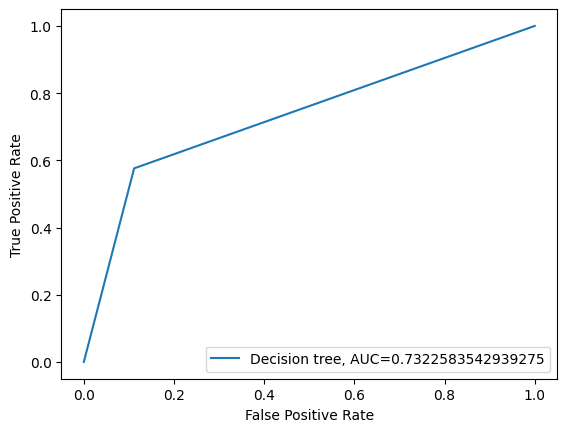

In [ ]:
from sklearn.metrics import roc_curve as rc, roc_auc_score as ra

fpr, tpr, _ = rc(y_test, d_test)
auc = ra(y_test, d_test)

# Plotting the ROC curve
plt.plot(fpr, tpr, label="Decision tree, AUC=" + str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


**Graph**

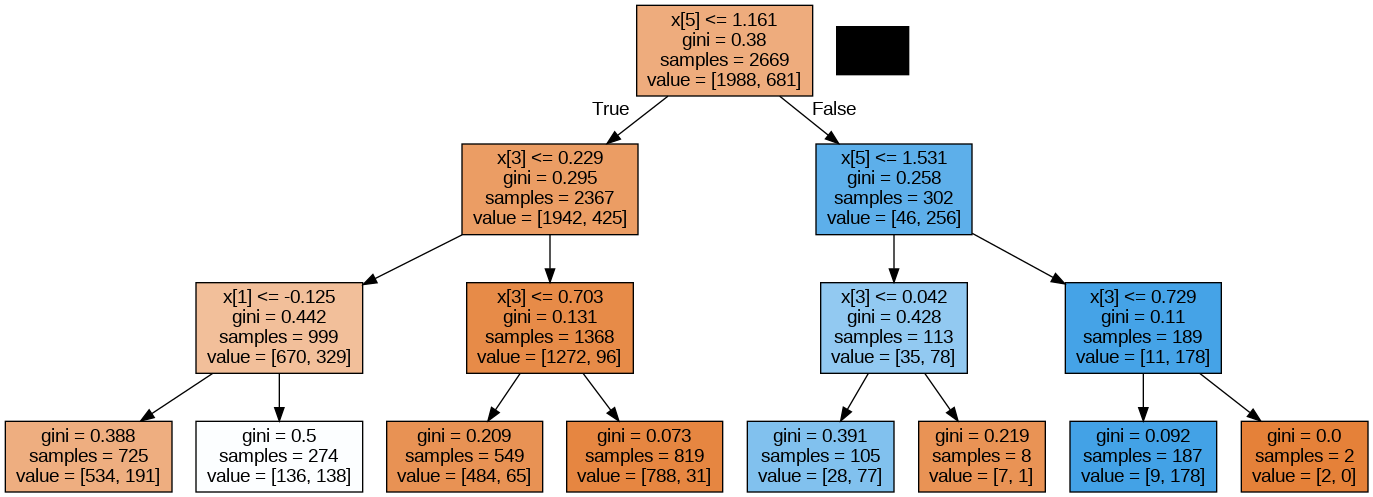

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(dt, out_file=None, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())


The above graph shows how a decision tree is able to make predictions by calculating all possibilities ,thus analysing complex data and in the end giving us better accuracy score. Next I am considering Random Forest.

**RandomForestClassifier**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as a

# Creating RandomForestClassifier model
rf = RandomForestClassifier(n_jobs=-1, random_state=42, max_depth=3)

# Fitting the model over the training dataset
rf.fit(x_train, y_train)

# Predicting values
r_train = rf.predict(x_train)
r_test = rf.predict(x_test)

# Calculating accuracy scores
asr_train = a(y_train, r_train)
asr_test = a(y_test, r_test)




**Model Performance**

In [ ]:
print(f"Random Forest Classifier :Accuracy score \nTrain - {asr_train}, \nTest - {asr_test}")


Random Forest Classifier :Accuracy score 
Train - 0.8430123641813413, 
Test - 0.8248502994011976


We can see that Random Forest Classifier Accuracy score is
Train data 84.3 %
Test data 82.4 %
The model is able to get a better understanding of unknown test data
the reason it has higher test accuracy than decision tree model is it builds Group of trees with non corelated outcomes which gives higher accuracy and the model is not over fitting.


**Cross validation**

In [ ]:
cv_rf = cv(rf, x_train, y_train, cv=5, scoring='accuracy')

print(f"Random Forest Mean CV Score: {cv_rf.mean()}")

Random Forest Mean CV Score: 0.8351490749133939


The mean cross validation score is 83.5 % which is higher than decision tree model

In [ ]:
confusion_matrix(y_test,r_test )

array([[462,  22],
       [ 95,  89]])

The confusion matrix indicates 462 true negatives, 22 false positives, 95 false negatives, and 89 true positives.  
- which means Random forest is able to predict better than decision tree.

**ROC Curve**

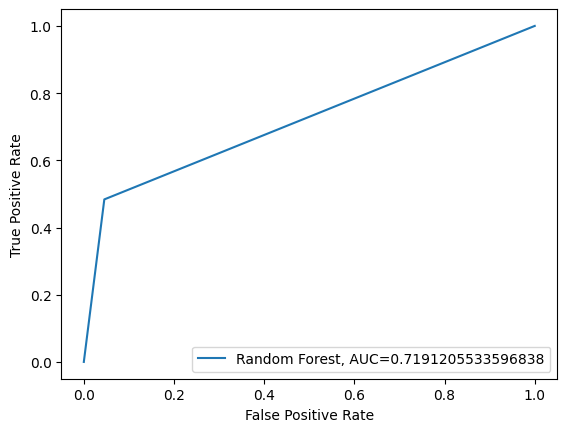

In [ ]:
from sklearn.metrics import roc_curve as rc, roc_auc_score as ra

fpr, tpr, _ = rc(y_test, r_test)
auc = ra(y_test, r_test)

# Plotting the ROC curve
plt.plot(fpr, tpr, label="Random Forest, AUC=" + str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


**GradientBoostingClassifier**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score as a

# Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Fit the model
gb.fit(x_train, y_train)

# Use the trained model to make predictions
g_train = gb.predict(x_train)
g_test = gb.predict(x_test)

# Calculate accuracy scores
asg_train = a(y_train, g_train)
asg_test = a(y_test, g_test)

**Model Performance**

In [ ]:
# Print accuracy scores
print(f"GradientBoostingClassifier : Accuracy Score \nTrain - {asg_train}, \nTest - {asg_test}")

GradientBoostingClassifier : Accuracy Score 
Train - 0.8789808917197452, 
Test - 0.8218562874251497


GradientBoost Model is able to achieve a training accuracy of 87 % and test accuracy of 82.1 % The model is able to get a better understanding of unknown test data and the model is not overfitting.This model uses slow learning process by using residuals.

**Cross validation**

In [ ]:
cvg = cv(gb, x_train, y_train, cv=9, scoring='accuracy')

print(f"Gradient Boost Mean CV Score: {cvg.mean()}")

Gradient Boost Mean CV Score: 0.8381462270351159


I am also considering Mean of Cross-Validation score ,which is 83.8 % ,now this is closer to test accuracy

In [ ]:
confusion_matrix(y_test,g_test )

array([[449,  35],
       [ 84, 100]])

The confusion matrix indicates 449 true negatives, 35 false positives, 84 false negatives, and 100 true positives.
- It is better in predicting True positives compared to random forest with mean CV score 83.8%

**ROC curve**

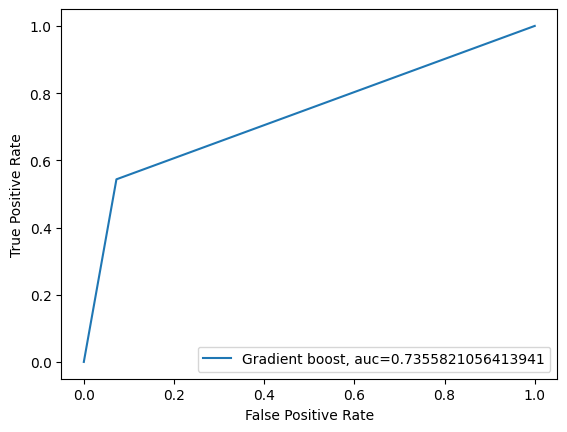

In [ ]:
from sklearn.metrics import roc_curve as rc, roc_auc_score as ra

 # Calculating and plotting auc value
fpr, tpr, _ = rc(y_test,g_test)
auc = ra(y_test, g_test)
plt.plot(fpr,tpr,label="Gradient boost, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()



**AdaBoostClassifier**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score as a

# Create AdaBoostClassifier model
ada = AdaBoostClassifier(learning_rate=0.02, n_estimators=1000)

# Fit the model
ada.fit(x_train, y_train)

# Use the trained model to make predictions
a_train = ada.predict(x_train)
a_test = ada.predict(x_test)

# Calculate accuracy scores
asa_train = a(y_train, a_train)
asa_test = a(y_test, a_test)



**Model Performance**

In [ ]:
# Print accuracy scores
print(f"AdaBoostClassifier : Accuracy Score \nTrain - {asa_train}, \nTest - {asa_test}")


AdaBoostClassifier : Accuracy Score 
Train - 0.8471337579617835, 
Test - 0.8278443113772455


We can see that Ada Boost Classifier Accuracy score is Train data 84.7 % Test data 82.7 %  and the model is not over fitting. the reason it has higher test accuracy is each tree learns and adapts from previous trees.The model is able to get a better understanding of unknown test data


**Cross validation**

In [ ]:
cv_ada = cv(ada, x_train, y_train, cv=5, scoring='accuracy')

print(f"Mean CV Score: {cv_ada.mean()}")

Mean CV Score: 0.8392682224142899


I am also calculating mean of cross validation scores to evaluate the accuracy more effectively. Here the mean cv score is 83.9 % and it is consistent  with train ,test scores.

**Steps to improve accuracy using Hyper parameter tuning**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create AdaBoostClassifier model with best hyperparameters
best_ada = AdaBoostClassifier(
    estimator=dt,
    n_estimators=2000,
    learning_rate=0.02,
    random_state=42
)

# Fit the model
best_ada.fit(x_train, y_train)

# Use the trained model to make predictions
ab_train = best_ada.predict(x_train)
ab_test = best_ada.predict(x_test)

# Calculate accuracy scores
ada_train = accuracy_score(y_train, a_train)
ada_test = accuracy_score(y_test, a_test)

# Print accuracy scores
print(f"AdaBoostClassifier : Accuracy Score \nTrain - {asa_train}, \nTest - {asa_test}")


AdaBoostClassifier : Accuracy Score 
Train - 0.8471337579617835, 
Test - 0.8278443113772455


After using best hyper parameters along with decision tree combination the model has highest test accuarcy of 82.7 % among all models.

In [ ]:
confusion_matrix(y_test,a_test )

array([[454,  30],
       [ 86,  98]])


The confusion matrix shows 454 true negatives, 30 false positives, 86 false negatives, and 98 true positives.This has better true negative prediction and mean CV score is 83.9 % which is highest among all models and has 1st highest test accuracy with 82.7 %

**ROC curve**

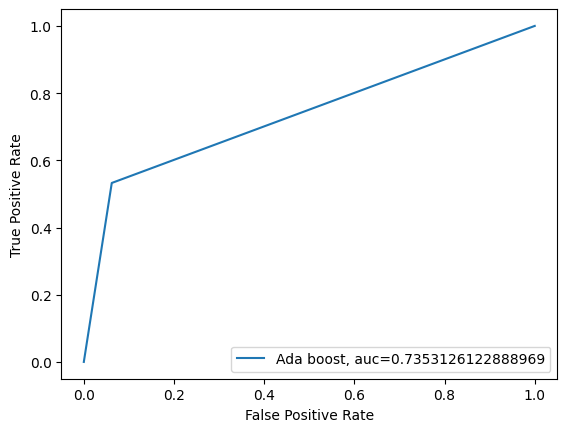

In [ ]:
from sklearn.metrics import roc_curve as rc, roc_auc_score as ra

 # Calculating and plotting auc value
fpr, tpr, _ = rc(y_test,a_test)
auc = ra(y_test, a_test)
plt.plot(fpr,tpr,label="Ada boost, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


**XG Boost Classifier**

In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score as a

# Creating XGBoost model
xgb = xgb.XGBClassifier(max_depth=5, n_estimators=1000, learning_rate=0.02, n_jobs=-1)

# Fitting the model
xgb.fit(x_train, y_train)

# Use the trained model to make predictions
xg_train = xgb.predict(x_train)
xg_test = xgb.predict(x_test)

# Calculate accuracy scores
asx_train = a(y_train, xg_train)
asx_test = a(y_test, xg_test)

**Model Performance**

In [ ]:
# Print accuracy scores
print(f"XGBoost Classifier : Accuracy Score \nTrain - {asx_train}, \nTest - {asx_test}")

XGBoost Classifier : Accuracy Score 
Train - 0.9411764705882353, 
Test - 0.8188622754491018


We can see that XG Boost Classifier Accuracy score is Train data 94.1 % Test data 81.8 % and the model is over fitting.So cross validation is required.

**Cross-validation using hyperparameter tuning**

In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score as a
from sklearn.model_selection import cross_val_score as cv


#  hyperparameters
xgb_model = xgb.XGBClassifier(
    max_depth=3,
    min_child_weight=1,
    learning_rate=0.1,
    gamma=0,
    n_estimators=100,
    n_jobs=-1
)

# Perform cross-validation
cv_xgb = cv(xgb_model, x_train, y_train, cv=5, scoring='accuracy')

# Fitting the modelt
xgb_model.fit(x_train, y_train)

# Use the trained model to make predictions
xg_train = xgb_model.predict(x_train)
xg_test = xgb_model.predict(x_test)

# Calculate accuracy scores
asx_train = a(y_train, xg_train)
asx_test = a(y_test, xg_test)

**Model Performance**

In [ ]:
print(f"XGBoost Classifier : Accuracy Score \nTrain - {asx_train}, \nTest - {asx_test}")
print(f"XG Boost Mean CV Score: {cv_xgb.mean()}")

XGBoost Classifier : Accuracy Score 
Train - 0.864743349569127, 
Test - 0.8233532934131736
XG Boost Mean CV Score: 0.837771500446206


We can see that after cross validation Accuracy score for Train data is 86.4 % Test data is 82.3 % , Mean CV score is 83% and the model is not over fitting.Now all the scores are consistent.It is similar to Gradient boosting ,only difference is it uses regularisation terms to avoid over fitting which gives a better accuracy.


In [ ]:
confusion_matrix(y_test,xg_test )

array([[450,  34],
       [ 84, 100]])

In the confusion matrix, there are 450 true negatives, 34 false positives, 84 false negatives, and 100 true positives with a better mean CV score of 83.7%.

**ROC curve**

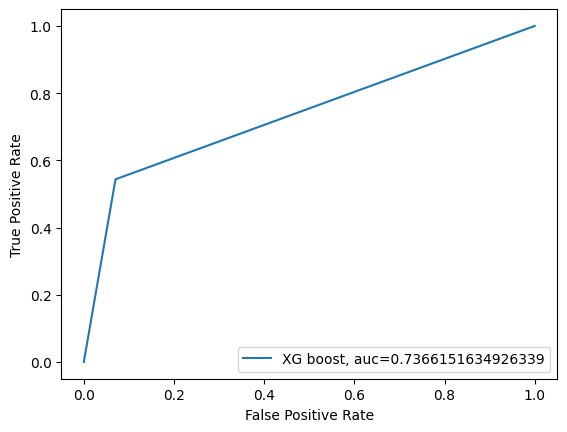

In [ ]:
from sklearn.metrics import roc_curve as rc, roc_auc_score as ra

 # Calculating and plotting auc value
fpr, tpr, _ = rc(y_test,xg_test)
auc = ra(y_test, xg_test)
plt.plot(fpr,tpr,label="XG boost, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


**LinearDiscriminantAnalysis**

In [ ]:
# Import necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score as a

# Creating Linear Discriminant Analysis (LDA) model
lda = LinearDiscriminantAnalysis()

# Fitting the model
lda.fit(x_train, y_train)

# use model to make predictions
ld_train = lda.predict(x_train)
ld_test = lda.predict(x_test)

# Calculate accuracy scores
asl_train = a(y_train, ld_train)
asl_test = a(y_test, ld_test)

**Model Performance**

In [ ]:
# Print accuracy scores
print(f"Linear Discriminant Analysis (LDA) : Accuracy Score \n Train - {asl_train}, \nTest - {asl_test}")


Linear Discriminant Analysis (LDA) : Accuracy Score 
 Train - 0.8284001498688648, 
Test - 0.8188622754491018


We can see that LDA Accuracy score is Train data 82.8 % Test data 81.8 %  and the model is not over fitting.It uses Bayes classifier - conditional probability and selects the group with highest probability.


**Cross validation**

In [ ]:
cv_lda = cv(lda, x_train, y_train, cv=5, scoring='accuracy')

print(f"LDA Mean CV Score: {cv_lda.mean()}")

LDA Mean CV Score: 0.82802945661263


Mean CV Score is 82.8 % which is consistent with test and train accuracy.

In [ ]:
confusion_matrix(y_test,ld_test )

array([[440,  44],
       [ 77, 107]])

In the confusion matrix, there are 440 true negatives, 44 false positives, 77 false negatives, and 107 true positives with a mean CV score of 82.8 %

**ROC curve**

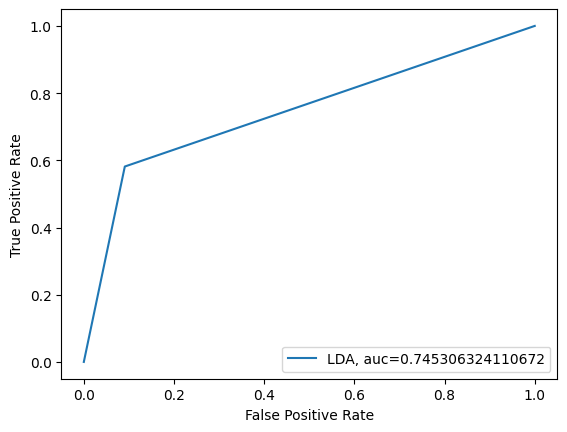

In [ ]:
from sklearn.metrics import roc_curve as rc, roc_auc_score as ra

 # Calculating and plotting auc value
fpr, tpr, _ = rc(y_test,ld_test)
auc = ra(y_test, ld_test)
plt.plot(fpr,tpr,label="LDA, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

**KNeighborsClassifier**

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier as k
from sklearn.metrics import accuracy_score as a

# Creating KNN classifier with neighbor value 1
knn = k(n_neighbors=1)

# Fitting the model
knn.fit(x_train, y_train)

# Use the trained model to make predictions
k_train = knn.predict(x_train)
k_test = knn.predict(x_test)

# Calculate accuracy scores
ask_train = a(y_train, k_train)
ask_test = a(y_test, k_test)

**Model Performance**

In [ ]:
# Print accuracy scores
print(f"KNN Classifier : Accuracy Score \nTrain - {ask_train}, \nTest - {ask_test}")

KNN Classifier : Accuracy Score 
Train - 1.0, 
Test - 0.7739520958083832


We can see that Training accuracy is 100% and test accuracy is 77% which is least compared to all models and  the model is over fitting . So cross validation is required.

**ROC curve**

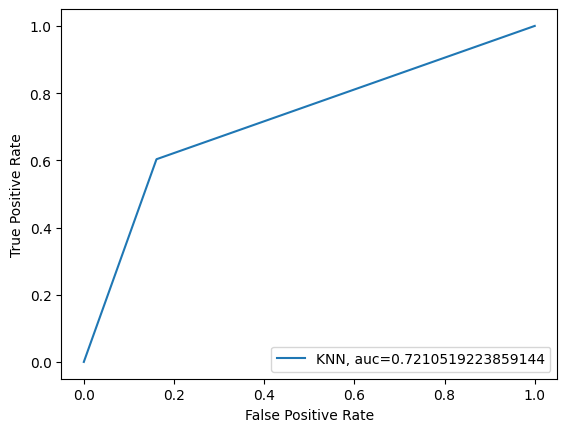

In [ ]:
from sklearn.metrics import roc_curve as rc, roc_auc_score as ra

 # Calculating and plotting auc value
fpr, tpr, _ = rc(y_test,k_test)
auc = ra(y_test, k_test)
plt.plot(fpr,tpr,label="KNN, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

**Steps to improve accuracy**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV as gs, cross_val_score as cv
from sklearn.neighbors import KNeighborsClassifier as k
from sklearn.metrics import accuracy_score as a

# Creating KNN classifier
knn = k(n_jobs=-1)

# Creating parameters dictionary
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# grid search
knn_search = gs(knn, params, cv=5)

# Fitting KNN model
knn_search.fit(x_train, y_train)

# Accessing the best parameter
best_params = knn_search.best_params_

# best estimator
knn_best = knn_search.best_estimator_

# Predicting values
kb_train = knn_best.predict(x_train)
kb_test = knn_best.predict(x_test)

# Calculating accuracy scores
askb_train = a(y_train, kb_train)
askb_test = a(y_test, kb_test)

print("Best Parameters:", best_params)


Best Parameters: {'n_neighbors': 10}


**Model Performance**

In [ ]:
print(f"Accuracy Score KNN classifier: \nTrain - {askb_train}, \nTest - {askb_test}")

Accuracy Score KNN classifier: 
Train - 0.8523791682278007, 
Test - 0.8098802395209581


We can see that , after cross validation ,KNN classifier Accuracy score for Train data - 85.2 % Test data - 80.9 % using best parameters n_neighbours = 10 and the model is not over fitting.

This model predicts by using by identifying the observations nearest to it using the hyper parameter K,It uses Bayes classifier - conditional probability

**Cross validation**

In [ ]:
# Performing cross-validation
cv_knn = cv(knn_best, x_train, y_train, cv=5, scoring='accuracy')
print("KNN Cross-Validation Accuracy:", cv_knn.mean())

KNN Cross-Validation Accuracy: 0.834024074035036


Mean CV Score is 83.4 % which is consistent with test and train accuracy.

In [ ]:
confusion_matrix(y_test,kb_test )

array([[456,  28],
       [ 99,  85]])

In the confusion matrix, there are 456 true negatives, 28 false positives, 99 false negatives, and 85 true positives with a good mean CV score of 83.4.

**ROC curve**

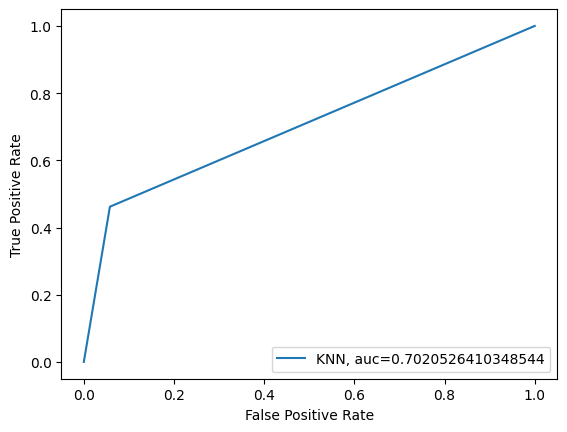

In [ ]:
from sklearn.metrics import roc_curve as rc, roc_auc_score as ra

 # Calculating and plotting auc value

fpr, tpr, _ = rc(y_test,kb_test)
auc = ra(y_test, kb_test)
plt.plot(fpr,tpr,label="KNN, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

**BaggingClassifier**

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score as a

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Create a Bagging Classifier with Decision Tree as base estimator
bg = BaggingClassifier(estimator=dt, n_estimators=10)

# Fit the Bagging model
bg.fit(x_train, y_train)

# Make predictions
b_train = bg.predict(x_train)
b_test = bg.predict(x_test)

# Calculate accuracy scores
asb_train = a(y_train, b_train)
asb_test = a(y_test, b_test)

**Model Performance**

In [ ]:
print(f"Bagging Classifier : Train Accuracy - {asb_train}, Test Accuracy - {asb_test}")


Bagging Classifier : Train Accuracy - 0.9842637692019482, Test Accuracy - 0.8158682634730539


 Bagging Classifier uses Bootstrap Aggregating technique.I used random forest as base estimator .We can see test accuracy is 81 % and train accuracy is 98 %,which means the model is over fitting.

**Cross validation**

In [ ]:
cv_bg = cv(bg, x_train, y_train, cv=5, scoring='accuracy')

print(f" Mean CV Score: {cv_bg.mean()}")

 Mean CV Score: 0.8194067921664523


Now after using cross validation ,we can see the mean score is 82% and the scores are consistent.

In [ ]:
confusion_matrix(y_test,b_test )

array([[444,  40],
       [ 85,  99]])

In the confusion matrix, there are 444 true negatives, 40 false positives, 85 false negatives, and 99 true positives with a mean CV score of 82 %.

**ROC Curve**

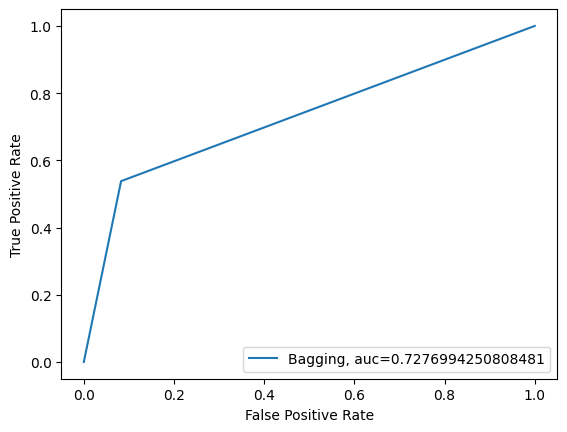

In [ ]:
from sklearn.metrics import roc_curve as rc, roc_auc_score as ra

 # Calculating and plotting auc value

fpr, tpr, _ = rc(y_test,b_test)
auc = ra(y_test, b_test)
plt.plot(fpr,tpr,label="Bagging, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

**Model Comparison**

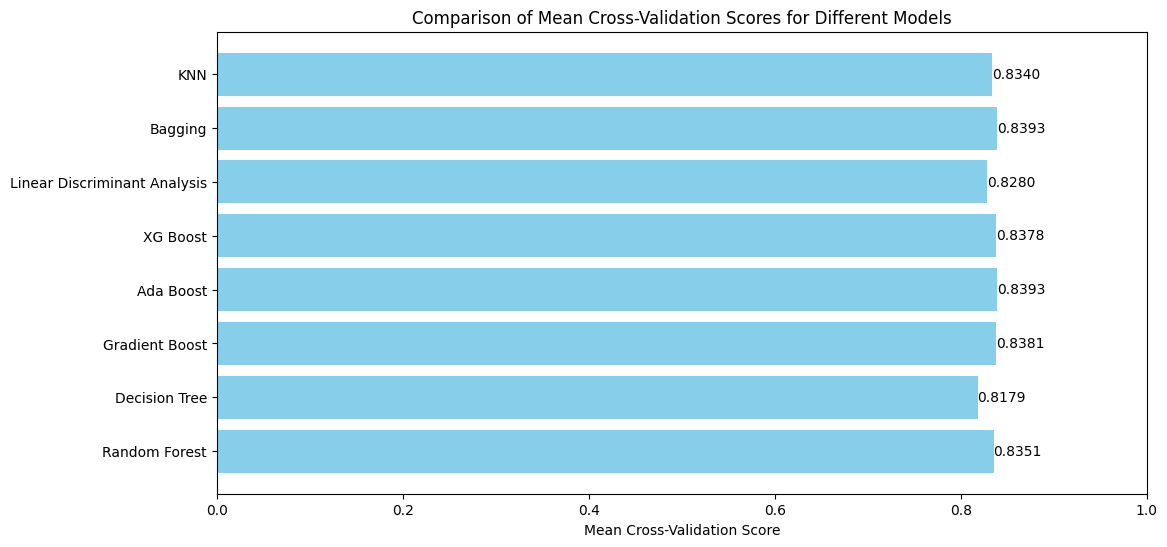

In [ ]:
# Mean cross-validation scores
cv_scores = {
    "Random Forest": cv_rf.mean(),
    "Decision Tree": cv_dt.mean(),
    "Gradient Boost": cvg.mean(),
    "Ada Boost": cv_ada.mean(),
    "XG Boost": cv_xgb.mean(),
    "Linear Discriminant Analysis": cv_lda.mean(),
    "Bagging": cv_bg.mean(),
    "KNN": cv_knn.mean()

}

# Bar chart for mean cross-validation scores
plt.figure(figsize=(12, 6))
bars_cv = plt.barh(list(cv_scores.keys()), list(cv_scores.values()), color='skyblue')
plt.xlabel('Mean Cross-Validation Score')
plt.title('Comparison of Mean Cross-Validation Scores for Different Models')
plt.xlim([0, 1])

# Adding labels to the bars
plt.bar_label(bars_cv, fmt='%.4f')

plt.show()


From above Bar chart ,we can see Ada boost and Bagging classifier has highest Mean CV score of 83.9 %, Gradient boost has 2nd highest Mean CV score and 3rd highest is XG boost with a slight 0.2 % difference.

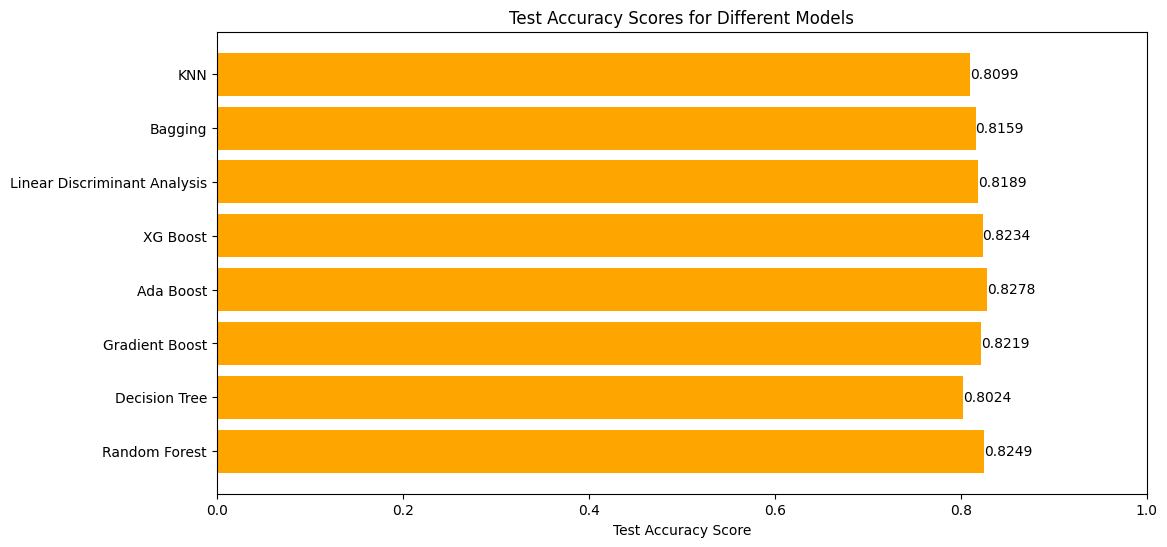

In [ ]:
# Test accuracy scores
test_accuracy_scores = {
    "Random Forest": asr_test,
    "Decision Tree": as_dt_test,
    "Gradient Boost": asg_test,
    "Ada Boost": asa_test,
    "XG Boost": asx_test,
    "Linear Discriminant Analysis": asl_test,
    "Bagging": asb_test,
    "KNN": askb_test
}

# Bar chart for test accuracy scores
plt.figure(figsize=(12, 6))
bars_test = plt.barh(list(test_accuracy_scores.keys()), list(test_accuracy_scores.values()), color='orange')
plt.xlabel('Test Accuracy Score')
plt.title('Test Accuracy Scores for Different Models')
plt.xlim([0, 1])

# Adding labels to the bars
plt.bar_label(bars_test, fmt='%.4f')

plt.show()


From above bar chart ,we can see Ada boost classifier has highest test accuracy with 82.7 % ,2nd highest is Random forest ,3rd highest is XG boost

Bagging and XG boost which had higher mean CV scores ,now has less test accuracy compared to Ada boost.

Only Ada boost is consistent in Both Test and mean CV scores along with training accuracy.

So the best performance is by Ada boost classifier.

**1. Your views about the problem statement?**

My views on problem statement are
- The Daily Buzz newspaper company wants to make accurate weather predictions by building Machine Learning models.
-I think it is a great initiative taken by company because Machine Learning models can analyse the past historical data and can make better predictions on weather.
-This will not only help the company improve its services to community but also save time and human effort by analysing complex and large weather data sets.
-As a a machine learning expert, Building Machine Learning models will help apply my knowledge ,problem solving skills  and also help The Daily Buzz company by providing better services to community in Sydney.
-Choosing Classification models is the right approach as the prediction is on categorical variables.
-While Building Machine Learning models is challenging,as my models can surely have a great impact on Company's performance I will try my best to build models with higher accuracy.

**2.What will be your approach to solving this task?**

My approach to solving this problem is

- I will upload the dataset to drive,load the necessary modules and mount to drive
-Then change the directory to project folder,read the excel file and create a data frame.
-Check for missing values and if present,fill them with mean value.
-Check for corelation between variables and delete the variables with higher corelation as they can lead to multi colinearity
- Delete if there are any unnecessary columns.
-Next identify outliers using various visualisations and capping them with Upper limit and lower limit values.
- Splitting the data into train and test data sets in 80:20
-Standardising the data
-Then I build various Machine learning models and evaluate model accuracy using test accuracy ,train accuracy and mean of cross validation scores.
-Then I will compare all the models with accuracy scores using a bar chart and select the model with highest test accuracy and mean Cross validation score which is Ada Boost Classifier.



**3. What were the available ML model options you had to perform this task?**

As the problem statement indicates predicting a categorical variable ,classification models are preferred.
- Decision Tree Classifier: It creates multiple
 decision trees using different subsets of the data, and then averages the predictions to give us the best accuarcy.
-Decision tree with grid search : It uses grid search with hyper parameters to find the best combination to give us the higher accuracy.
- Random forest : it builds Group of trees with non corelated outcomes which gives higher accuracy
- Gradient Boost Classifier:This model uses slow learning process by using residual trees.
- Ada Boost Classifier:The unique feature of this model is the trees learns and adapts from previous trees which helps in better accuracy and counter act over fitting as well.
- XG Boost Classifier:It is similar to Gradient boosting ,only difference is it uses regularisation terms to avoid over fitting which gives a better accuracy.
- Linear Discriminant Analysis:It uses Bayes classifier - conditional probability and selects the group with highest probability.It is suiy=table when there are multiple classes.
- KNN Boost Classifier:This model predicts by using by identifying the observations nearest to it using the hyper parameter K,It uses Bayes classifier  conditional probability
- Bagging Classifier uses Bootstrap Aggregating technique



**4.Which model’s performance is best and what could be the possible reason for that?**

The model with best performance is  Ada Boost Classifier.It has highest test accuracy of 82.7 % .
 When a model performs higher on an unknown test data set then that is considered more reliable.Also,It has the highest mean cross validation accuarcy of 83.9 %.So overall Ada boost is more reliable because of its adaptive nature.The reason it has higher test accuracy than all models is each tree learns and adapts from previous trees which helps in better accuracy and counter act over fitting as well.It can handle class imbalances better and has less tendency to over fit as it adapts from previous tress .It is easier to implement ,it can handle weak learners well and still achieve higher performance.

**5.What steps can you take to improve this selected model’s performance even further?**

Ada Boost classifier accuarcy can be improved in several ways.
- When we use hyper parameter tuning to find the best combination that improves accuracy.
- Combining with other classifiers like decision tree will also help us improve its accuracy.
- When we increase the Number of Estimators then the model can adapt and learn form more trees which helps to improve accuracy ,it can also lead to over fitting.
- So ,monitoring the over fitting and using cross validation when ever required helps us remove over fitting and improve accuracy.
- By tuning the learning rate ,the contribution of weak trees shrinks and overall accuracy improves.
- If we provide more quality data with important feature the quality of output accuracy increases as the basic rule of Machine learning is Quality input gives Quality output.

Thus hyper parameter tuning,Combining with other classifiers,increase the Number of Estimators,cross validation,tuning the learning rate helps in improving accuracy.